In [13]:
import numpy as np

In [1]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',version=1)
mnist.keys()


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [2]:
X,y=mnist['data'],mnist['target']

In [3]:
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

In [5]:
import matplotlib.pyplot as plt
import matplotlib as mplt

In [8]:
some_digit=X[0]
type(some_digit)

numpy.ndarray

In [9]:
some_digit_shape=some_digit.reshape(28,28)

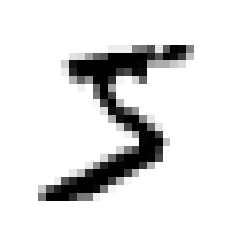

In [10]:
plt.imshow(some_digit_shape,cmap=mplt.cm.binary,interpolation='nearest')
plt.axis('off')
plt.show()

In [12]:
type(y)

numpy.ndarray

In [14]:
y=y.astype(np.uint8)

In [15]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [16]:
y_train_5=(y_train==5)
y_test_5=(y_test==5)

In [18]:
from sklearn.linear_model import SGDClassifier

In [19]:
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [21]:
sgd_clf.predict([some_digit])

array([ True])

In [22]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [23]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [25]:
from sklearn.metrics import precision_score,recall_score

In [26]:
precision_score(y_train_5,y_train_pred)

0.8370879772350012

In [27]:
recall_score(y_train_5,y_train_pred)

0.6511713705958311

In [28]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7325171197343846

In [29]:
y_score=sgd_clf.decision_function([some_digit])

In [31]:
y_score

array([2164.22030239])

In [32]:
threshold=0

In [33]:
y_score=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method='decision_function')

In [51]:
from sklearn.metrics import precision_recall_curve
precision,recall,threshold=precision_recall_curve(y_train_5,y_score)

In [35]:
def plot_precision_recall_vs_threshold(precision,recall,threshold):
  plt.plot(threshold,precision[:-1],'b-',label='Precision')
  plt.plot(threshold,recall[:-1],'g-',label='recall')

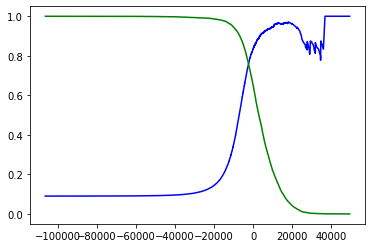

In [36]:
plot_precision_recall_vs_threshold(precision,recall,threshold)
plt.show()

In [37]:
threshold_90_precision=threshold[np.argmax(precision>=0.9)]

In [38]:
threshold_90_precision

3370.0194991439557

In [39]:
y_train_pred_90=(y_score>=threshold_90_precision)


In [40]:
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [41]:
recall_score(y_train_5,y_train_pred_90)

0.4799852425751706

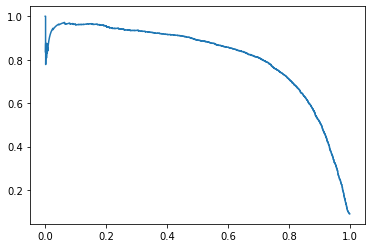

In [55]:
plt.plot(recall,precision)
plt.show(f)

In [56]:
from sklearn.metrics import roc_curve
fpr,tpr,threshold=roc_curve(y_train_5,y_score)

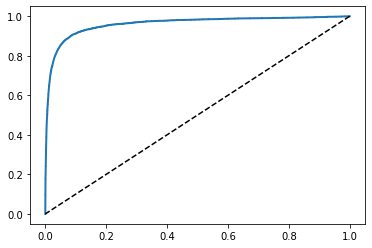

In [59]:
plt.plot(fpr,tpr,linewidth=2)
plt.plot([1,0],[1,0],'k--')
plt.show()

In [61]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_score)

0.9604938554008616

In [62]:
from sklearn.ensemble import RandomForestClassifier
forest_clf=RandomForestClassifier(random_state=42)
y_proba_forest=cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method='predict_proba')

In [64]:
y_score_forest=y_proba_forest[:,1]
fpr_forest,trp_forest,threshold=roc_curve(y_train_5,y_score_forest)

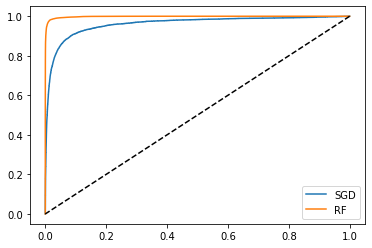

In [70]:
plt.plot(fpr,tpr,label='SGD')
plt.plot(fpr_forest,trp_forest,label='RF')
plt.plot([1,0],[1,0],'k--')
plt.legend()
plt.show()

In [71]:
roc_auc_score(y_train_5,y_score_forest)

0.9983436731328145

In [72]:
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [74]:
some_digit_score=sgd_clf.decision_function([some_digit])
sorted(some_digit_score)

[array([-31893.03095419, -34419.69069632,  -9530.63950739,   1823.73154031,
        -22320.14822878,  -1385.80478895, -26188.91070951, -16147.51323997,
         -4604.35491274, -12050.767298  ])]

In [75]:
forest_clf.fit(X_train,y_train)
forest_clf.predict([some_digit])

array([5], dtype=uint8)

In [76]:
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring='accuracy')


array([0.87365, 0.85835, 0.8689 ])

In [77]:
cross_val_score(forest_clf,X_train,y_train,scoring='accuracy')


array([0.96808333, 0.96566667, 0.96541667, 0.962     , 0.97108333])

In [79]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf,X_train_scaled,y_train,cv=3,scoring='accuracy')

array([0.8983, 0.891 , 0.9018])

In [81]:
y_train_pred=cross_val_predict(sgd_clf, X_train_scaled,y_train,cv=3)
conf_mx=confusion_matrix(y_train,y_train_pred)

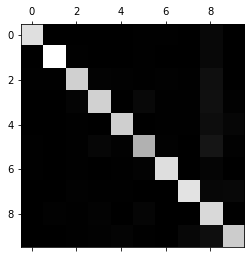

In [84]:
plt.matshow(conf_mx,cmap=plt.cm.gray)

In [85]:
row_sums=conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx=conf_mx/row_sums

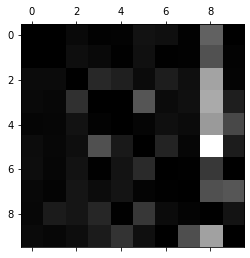

In [88]:
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)
plt.show()